In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 7
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
weather_2012 = pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time (LST)')
weather_2012[:5]

,Longitude (x),Latitude (y),Station Name,Climate ID,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time (LST),,,,,,,,,,,
2012-01-01 00:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,45.47,MONTREAL/PIERRE ELLIOTT TRUDEAU INTL A,7025250,-1.5,-3.3,88,7,4.8,101.23,Fog


In [8]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing[:5]

Date/Time (LST)
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

<Axes: xlabel='Date/Time (LST)'>

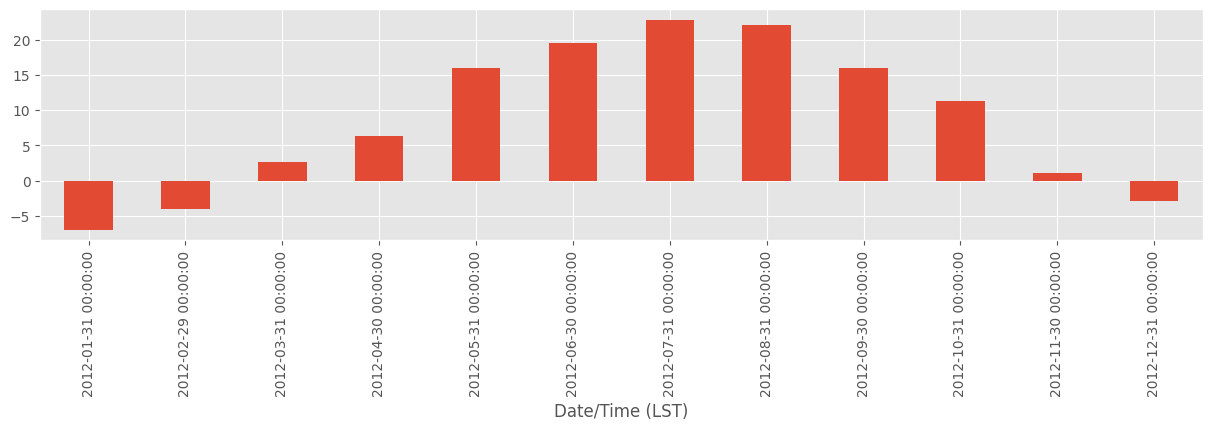

In [11]:
weather_2012['Temp (°C)'].resample('ME').median().plot(kind='bar')

In [12]:
is_snowing.astype(int)[:10]

Date/Time (LST)
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
                      ..
2012-01-01 07:00:00    0
2012-01-01 08:00:00    0
2012-01-01 09:00:00    0
Name: Weather, Length: 10, dtype: int64

In [14]:
is_snowing.astype(int).resample('ME').mean()

Date/Time (LST)
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
                ...   
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: ME, Name: Weather, Length: 12, dtype: float64

<Axes: xlabel='Date/Time (LST)'>

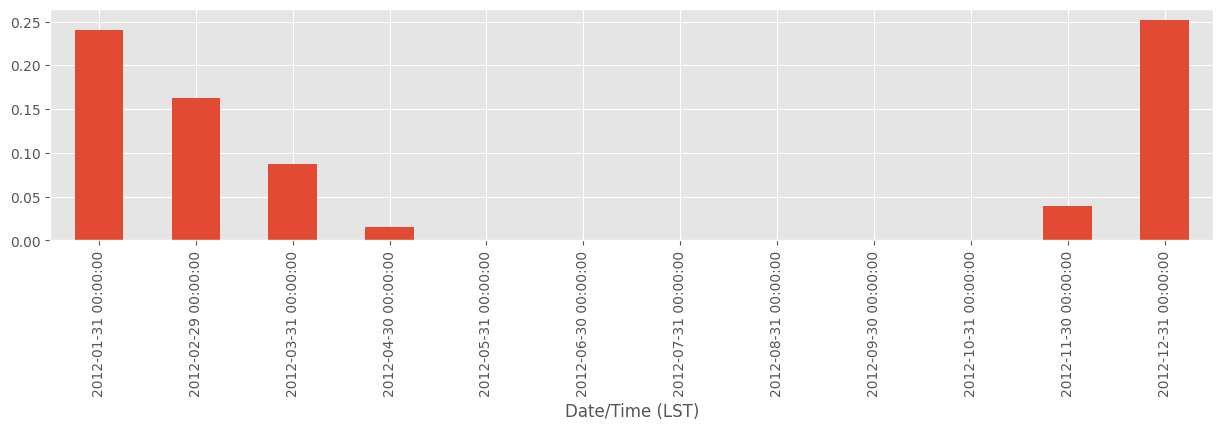

In [15]:
is_snowing.astype(int).resample('ME').mean().plot(kind='bar')

In [17]:
temperature = weather_2012['Temp (°C)'].resample('ME').median()
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(int).resample('ME').mean()
temperature.name = 'Temperature'
snowiness.name = 'Snowiness'

In [18]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time (LST),,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
...,...,...
2012-10-31,11.30,0.000000
2012-11-30,1.05,0.038889
2012-12-31,-2.85,0.251344


array([<Axes: title={'center': 'Temperature'}, xlabel='Date/Time (LST)'>,
       <Axes: title={'center': 'Snowiness'}, xlabel='Date/Time (LST)'>],
      dtype=object)

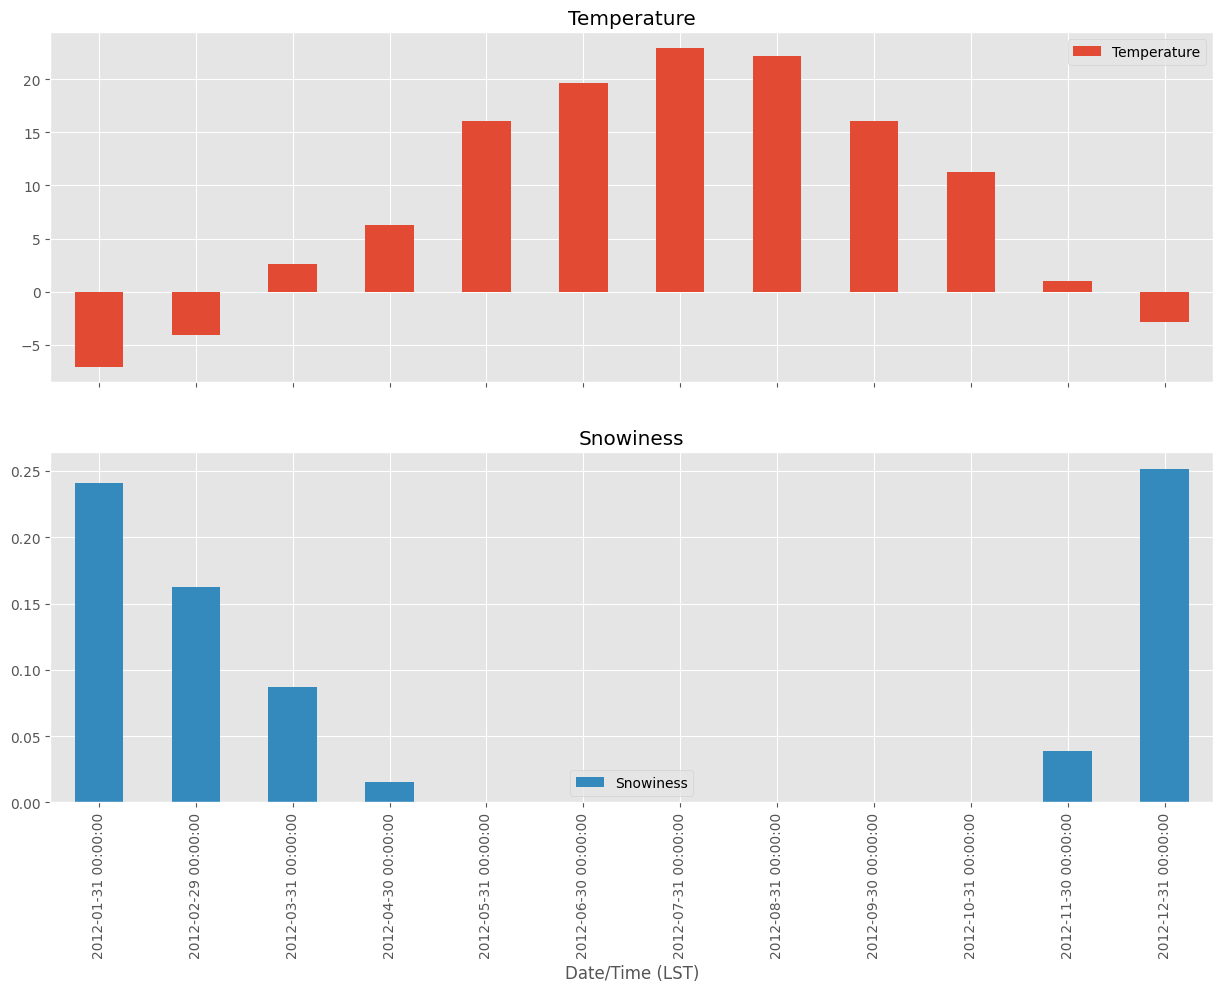

In [19]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))